## Grayscaling

#### Grayscaling is process by which an image is converted from a full color to shades of gray (black & white)

In OpenCV, many functions grayscale images before processing. This is done because it simplifies the image, acting almost as a noise reduction and increasing processing time as there is less information in the image.

### Let convert our color image to grayscale

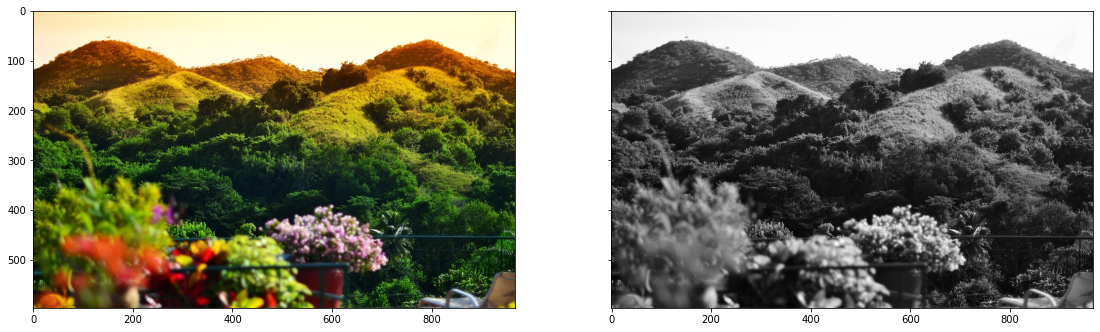

In [80]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(19, 6), sharex=True, sharey=True)

# Load our input image
image = cv2.imread('./images/input.jpg')
ax[0].imshow(image[:, :, ::-1])

# We use cvtColor, to convert to grayscale
# It takes 2 arguments, the first being the input image
# The second being the color space conversion code 
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ax[1].imshow(gray_image, cmap="gray")

### Read more about it here:
https://docs.opencv.org/master/d8/d01/group__imgproc__color__conversions.html
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html
    
    

### Let's now explore lookng at individual channels in an RGB image

(597, 968)


Text(0.5, 1.0, 'Red')

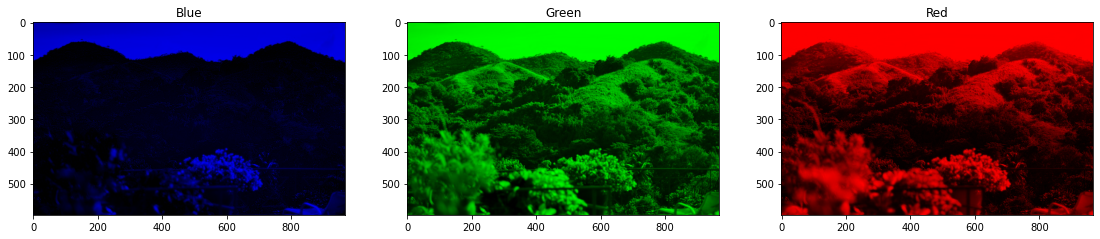

In [81]:

B, G, R = cv2.split(image)
print(B.shape)
# Let's create a matrix of zeros 
# with dimensions of the image h x w  
zeros = np.zeros(image.shape[:2], dtype = "uint8")

plt.figure(figsize=(19, 6))

ax = plt.subplot(1, 3, 1)
ax.imshow(cv2.merge([zeros, zeros, B])); ax.set_title('Blue')

ax = plt.subplot(1, 3, 2)
ax.imshow(cv2.merge([zeros, G, zeros])); ax.set_title('Green')

ax = plt.subplot(1, 3, 3)
ax.imshow(cv2.merge([R, zeros, zeros])); ax.set_title('Red')


### Let's merge all colors to obtain the original image and then let's boost the blue colors 

Note adding 100 to blue values will cap them at 255 (we can't exceed 255 as it is our maximum brightness)

(597, 968)


Text(0.5, 1.0, 'Merged with Green Amplified')

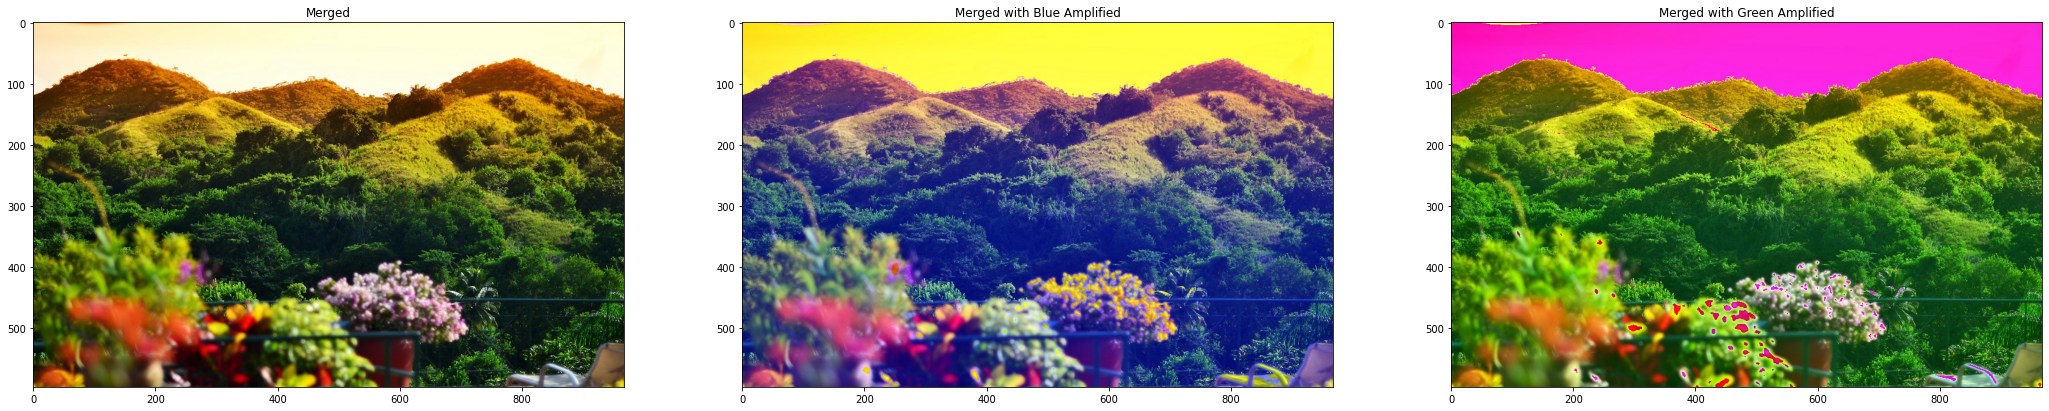

In [82]:
image = cv2.imread('./images/input.jpg')

# OpenCV's 'split' function splites the image into each color index
B, G, R = cv2.split(image)
print(B.shape)

plt.figure(figsize=(36, 12))

# Let's re-make the original image, 
merged = cv2.merge([B, G, R]) 
ax = plt.subplot(1, 3, 1)
ax.imshow(merged[:, :, ::-1]); ax.set_title('Merged')

# Let's amplify the blue color
merged = cv2.merge([B + 100, G, R])
ax = plt.subplot(1, 3, 2)
ax.imshow(merged[:, :, ::-1]); ax.set_title('Merged with Blue Amplified')

# Let's amplify the green color
merged = cv2.merge([B, G + 40, R])
ax = plt.subplot(1, 3, 3)
ax.imshow(merged[:, :, ::-1]); ax.set_title('Merged with Green Amplified')


### Another useful color space is HSV 
Infact HSV is very useful in color filtering.

Text(0.5, 1.0, 'Value channel')

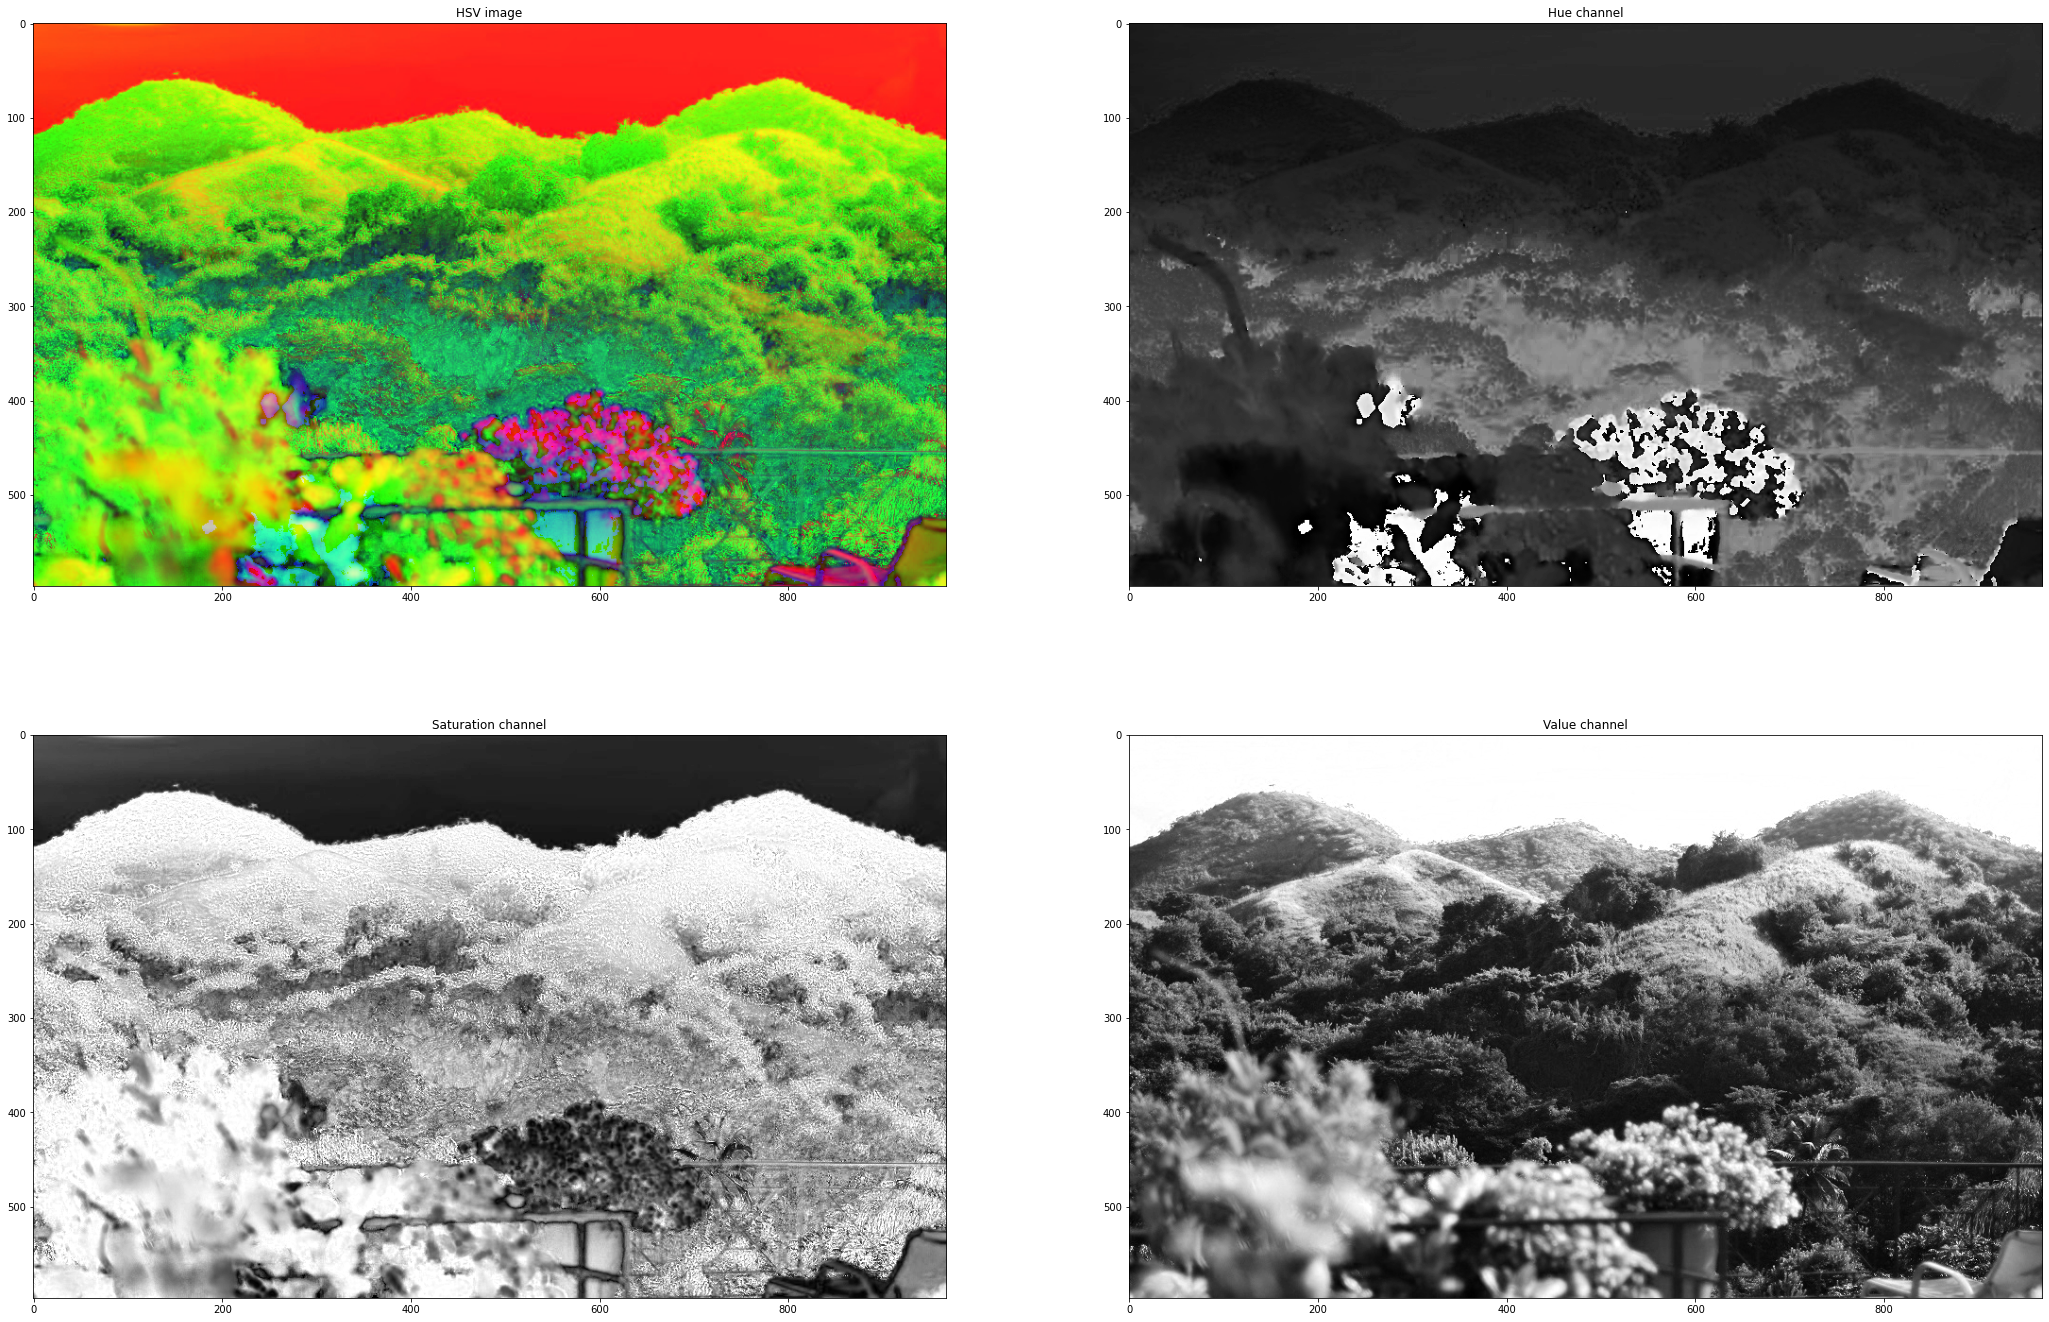

In [83]:
#H: 0 - 179, S: 0 - 255, V: 0 - 255

plt.figure(figsize=(36, 24))

image = cv2.imread('./images/input.jpg')

# Convert to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# View each channel type in the HSV Color Space representation
ax = plt.subplot(2, 2, 1)
ax.imshow(hsv_image[:, :, ::-1]); ax.set_title('HSV image')
ax = plt.subplot(2, 2, 2)
ax.imshow(hsv_image[:, :, 0], cmap="gray"); ax.set_title('Hue channel')
ax = plt.subplot(2, 2, 3)
ax.imshow(hsv_image[:, :, 1], cmap="gray"); ax.set_title('Saturation channel')
ax = plt.subplot(2, 2, 4)
ax.imshow(hsv_image[:, :, 2], cmap="gray"); ax.set_title('Value channel')
